In [1]:
def calc(valor_aluguel, valor_imovel, taxa_valorizacao_imovel,taxa_reajuste_aluguel, taxa_juros_aplicacao,anos):

    #inicializando
    taxa_valorizacao_imovel = taxa_valorizacao_imovel/100
    taxa_reajuste_aluguel = taxa_reajuste_aluguel/100
    taxa_juros_aplicacao = taxa_juros_aplicacao/100

    # Transformando a taxa de juros de anual para mensal
    taxa_juros_aplicacao_mensal   = (1 + taxa_juros_aplicacao) ** (1/12) - 1
    taxa_juros_valorizacao_mensal = (1 + taxa_valorizacao_imovel) ** (1/12) - 1

    # Inicializando os valores iniciais
    valor_aplicacao     = valor_imovel
    valor_aluguel_atual = valor_aluguel

    # Inicializando listas para armazenar os resultados mês a mês
    meses             = []
    valores_aplicacao = []
    valores_imovel    = []
    turnover          = []

    # Simulando o cenário mês a mês ao longo dos anos (entrada da função)
    for mes in range(1, 12*anos+1):
        # Atualizando o valor do imóvel com a taxa de valorização mensal
        valor_imovel *= (1 + taxa_juros_valorizacao_mensal)

        # Atualizando o valor da aplicação com os juros mensais subtraindo o valor do aluguel
        valor_aplicacao *= (1 + taxa_juros_aplicacao_mensal)
        valor_aplicacao -= valor_aluguel_atual

        # Atualizando o valor do aluguel com o reajuste anual
        if mes % 12 == 0:  # Verifica se é o mês de reajuste (a cada 12 meses)
            valor_aluguel_atual *= (1 + taxa_reajuste_aluguel)

        # Salva os resultados do mês atual nas listas
        meses.append(mes)
        valores_aplicacao.append(valor_aplicacao)
        valores_imovel.append(valor_imovel)

        if mes == 1:
          if valor_aplicacao > valor_imovel:
            montante_maior = "A"
          else:
            montante_maior = "I"

        if montante_maior == "A":
          if valor_aplicacao < valor_imovel:
            turnover.append("SIM")
            montante_maior = "I"
          else:
            turnover.append("NAO")
        elif montante_maior == "I":
          if valor_imovel < valor_aplicacao:
            turnover.append("SIM")
            montante_maior = "A"
          else:
            turnover.append("NAO")

    lista_combinada = list(zip(meses, valores_aplicacao, valores_imovel, turnover))

    dicionario = {}

    for mes, aplicacao, imovel, ponto_turnover in lista_combinada:
        dicionario[mes] = (aplicacao, imovel, ponto_turnover)

    return dicionario


In [2]:
def resumo(resultado):
    from babel.numbers import format_currency

    chave_ultima = max(resultado.keys())
    valor_ultima = resultado[chave_ultima]

    aplicacao_final = valor_ultima[0]
    imovel_final    = valor_ultima[1]

    aplicacao_final_f = format_currency(aplicacao_final, 'BRL', locale='pt_BR')
    imovel_final_f    = format_currency(imovel_final, 'BRL', locale='pt_BR')

    mes_turnover = 0

    if  aplicacao_final > imovel_final:
        texto_melhor_escolha = "Após {} anos: ".format(anos)+ '\n' + f"O valor total da Aplicação será {aplicacao_final_f}."+ '\n' + f"O valor total do Imóvel será {imovel_final_f}."+ '\n' + "Portanto é mais vantajoso ALUGAR o imóvel."
    else:
        texto_melhor_escolha = "Após {} anos: ".format(anos)+ '\n' + f"O valor total da Aplicação será {aplicacao_final_f}."+ '\n' + f"O valor total do Imóvel será {imovel_final_f}."+ '\n' + "Portanto é mais vantajoso COMPRAR o imóvel."

    for chave, valor in resultado.items():
        if "SIM" in valor:
           mes_turnover = chave

        if mes_turnover > 0:
           valor_turnover_aplicacao = format_currency(resultado[mes_turnover][0], 'BRL', locale='pt_BR')
           valor_turnover_imovel    = format_currency(resultado[mes_turnover][1], 'BRL', locale='pt_BR')

           texto_turnover_mes       = f"Turnover após {mes_turnover} meses"
           texto_turnover_aplicacao = f"Valor da aplicação: {valor_turnover_aplicacao}"
           texto_turnover_imovel    = f"Valor do imóvel: {valor_turnover_imovel}"

           if resultado[mes_turnover][0] > resultado[mes_turnover][1]:
               diferenca = resultado[mes_turnover][0] - resultado[mes_turnover][1]
           else:
               diferenca = resultado[mes_turnover][1] - resultado[mes_turnover][0]

           diferenca = format_currency(diferenca, 'BRL', locale='pt_BR')

           texto_turnover_diferenca = f"Diferença: {diferenca}"
           texto_turnover_resumo    = texto_turnover_mes+ '\n' + texto_turnover_aplicacao+ '\n' + texto_turnover_imovel+ '\n' + texto_turnover_diferenca

           texto = texto_melhor_escolha + '\n' + '\n' +texto_turnover_resumo
        else:
           texto = texto_melhor_escolha + '\n' +'\n' + "Não houve Turnover"
    return texto


In [3]:
def grafico(resultado):
  import matplotlib.pyplot as plt

  # Obtém as chaves e os valores da tupla para o eixo x e eixo y, respectivamente
  meses = list(resultado.keys())
  aplicacao = [valor[0] for valor in resultado.values()]
  imovel = [valor[1] for valor in resultado.values()]

  # Plota os valores em um gráfico de linhas
  plt.plot(meses, aplicacao, label='Montante Aplicação')
  plt.plot(meses, imovel, label='Valorização Imovel')

  # Configurações do gráfico
  plt.xlabel('Mês')
  plt.ylabel('Valor R$')
  plt.title('Comparação entre a Aplicação e a Valorização do Imóvel')
  plt.legend()  # Mostra a legenda com os rótulos dos valores

  plt.show()



In [4]:
def exporta(resultado):
  import json
  from google.colab import drive
  drive.mount('/content/drive')

  arquivo_json = '/content/sample_data/dados.json'

  with open(arquivo_json, 'w') as arquivo:
    json.dump(resultado, arquivo)

Após 20 anos: 
O valor total da Aplicação será R$ 2.043.701,07.
O valor total do Imóvel será R$ 1.934.842,23.
Portanto é mais vantajoso ALUGAR o imóvel.

Turnover após 171 meses
Valor da aplicação: R$ 1.311.887,75
Valor do imóvel: R$ 1.311.260,07
Diferença: R$ 627,68


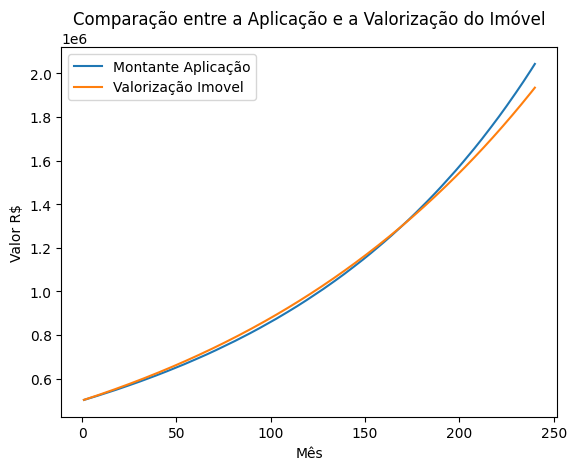

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#Simulação do uso da função

try:

  valor_aluguel           = 2200
  valor_imovel            = 500000
  taxa_valorizacao_imovel = 7
  taxa_reajuste_aluguel   = 5
  taxa_juros_aplicacao    = 12
  anos                    = 20

  resultado = calc(valor_aluguel, valor_imovel, taxa_valorizacao_imovel, taxa_reajuste_aluguel, taxa_juros_aplicacao,anos)

  print(resumo(resultado))
  grafico(resultado)
  exporta(resultado)

except:
  print("Entrada inválida. Certifique-se de digitar números válidos.")

